<a href="https://colab.research.google.com/github/abselon/COAL-Labs/blob/main/X_RayML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from model import build_model

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'data/train'
val_dir = 'data/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

model = build_model()

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
)

model.save('model.h5')

import sys
sys.path.append('model')

import os
from flask import Flask, request, render_template
from predict import predict_ecg

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/', methods=['POST'])
def upload_file():
    file = request.files['ecg']
    filepath = os.path.join('uploads', file.filename)
    file.save(filepath)
    prediction = predict_ecg(filepath)
    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


In [2]:
data_dir = '/drive/xray_samples/'


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
from tensorflow.keras.optimizers import RMSprop
from keras.utils import load_img, img_to_array

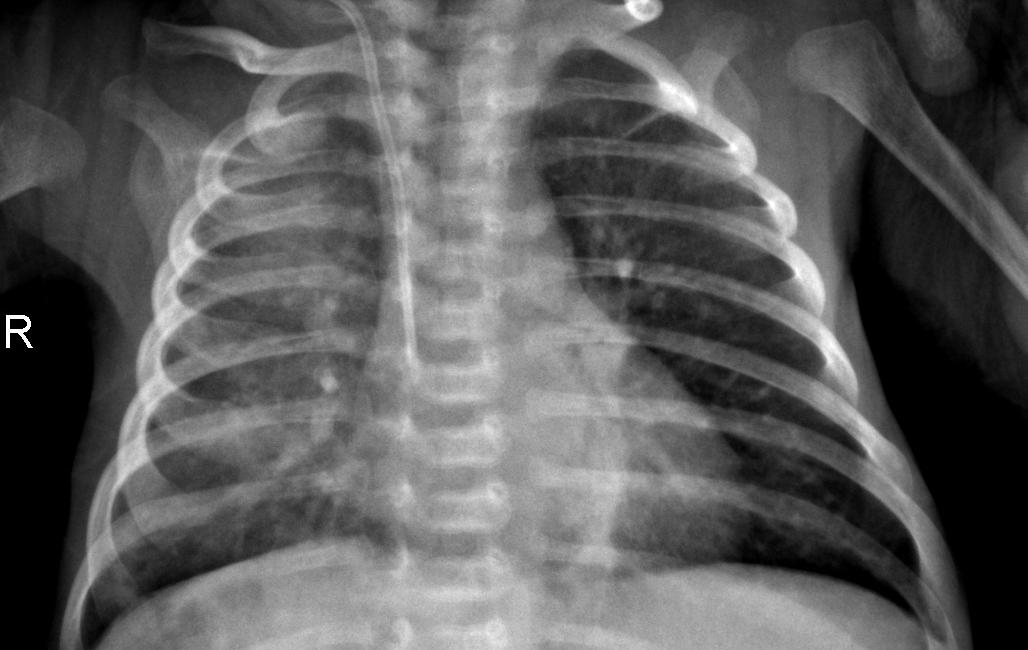

In [4]:
img = image.load_img("/content/drive/MyDrive/xray_samples/train/err/person10_bacteria_43.jpeg")
img

In [65]:
cv2.imread("/content/drive/MyDrive/xray_samples/train/err/person10_bacteria_43.jpeg").shape

(650, 1028, 3)

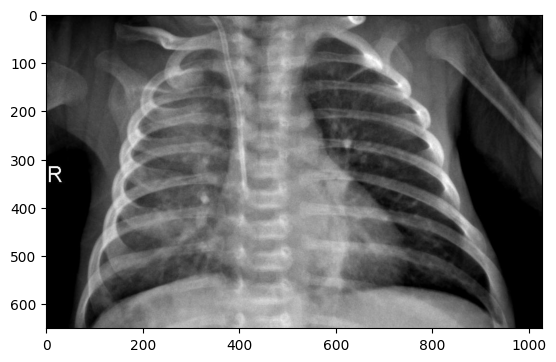

In [11]:
plt.imshow(img)

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/xray_samples/train", target_size= (200, 200), batch_size = 4, class_mode = 'binary')
validation_dataset = train.flow_from_directory("/content/drive/MyDrive/xray_samples/validation", target_size= (200, 200), batch_size = 4, class_mode = 'binary')

Found 119 images belonging to 2 classes.
Found 0 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'err': 0, 'norm': 1}

In [9]:
model =tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200, 200, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (200, 200, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (200, 200, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   #
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   #
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

In [11]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 100,
                      validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 3s 694ms/step - loss: 1.8736 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 2s 625ms/step - loss: 0.6651 - accuracy: 0.5455
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.6581 - accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 2s 624ms/step - loss: 0.6664 - accuracy: 0.9167
Epoch 5/100
3/3 [==============================] - 2s 570ms/step - loss: 0.6600 - accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 2s 581ms/step - loss: 0.5714 - accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 2s 714ms/step - loss: 0.6404 - accuracy: 0.6667
Epoch 8/100
3/3 [==============================] - 3s 1s/step - loss: 0.4612 - accuracy: 0.7500
Epoch 9/100
3/3 [==============================] - 3s 903ms/step - loss: 0.5413 - accuracy: 0.8333
Epoch 10/100
3/3 [==============================] - 2s 589ms/step - loss: 0.3124 - accuracy: 0.9167
Epoch 11/100
3/

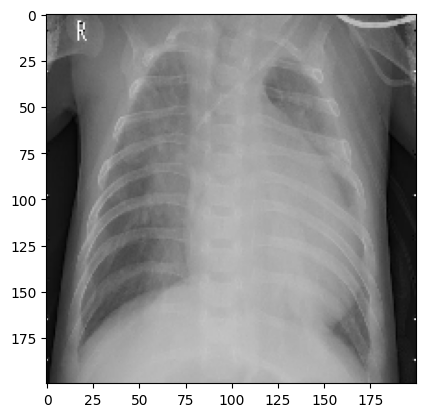

1/1 [==============================] - 0s 290ms/step
X-Ray shows signs of Pnuemonia


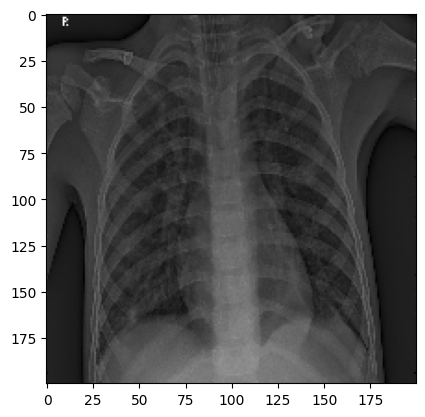

1/1 [==============================] - 0s 87ms/step
X-Ray shows signs of Pnuemonia


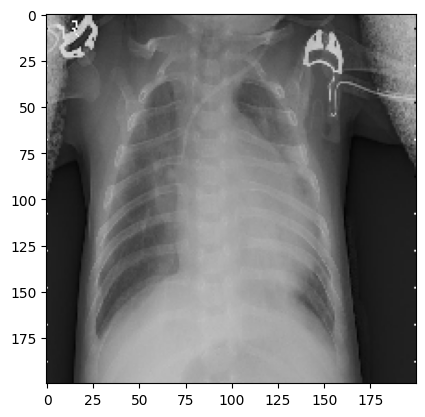

1/1 [==============================] - 0s 61ms/step
X-Ray shows signs of Pnuemonia


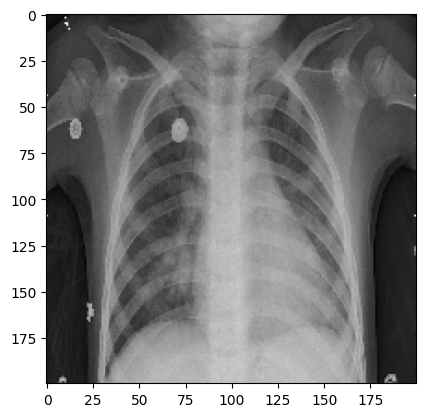

1/1 [==============================] - 0s 78ms/step
X-Ray shows signs of Pnuemonia


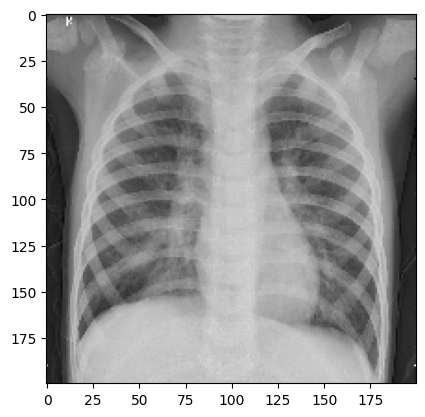

1/1 [==============================] - 0s 68ms/step
X-Ray shows signs of Pnuemonia


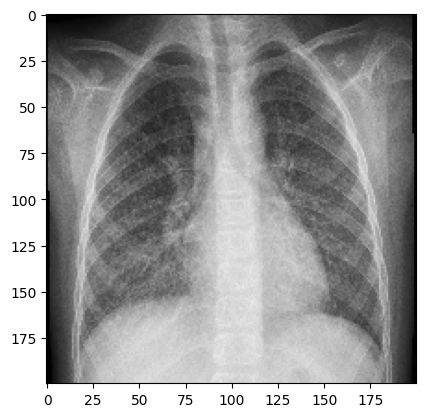

1/1 [==============================] - 0s 64ms/step
X-Ray shows signs of Pnuemonia


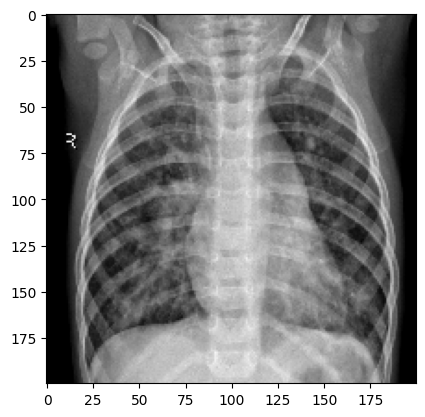

1/1 [==============================] - 0s 49ms/step
X-Ray shows NO signs of Pnuemonia


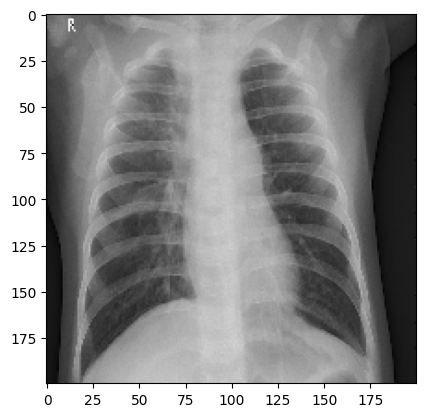

1/1 [==============================] - 0s 49ms/step
X-Ray shows signs of Pnuemonia


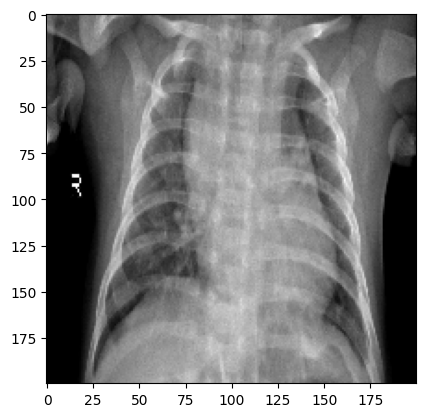

1/1 [==============================] - 0s 49ms/step
X-Ray shows signs of Pnuemonia


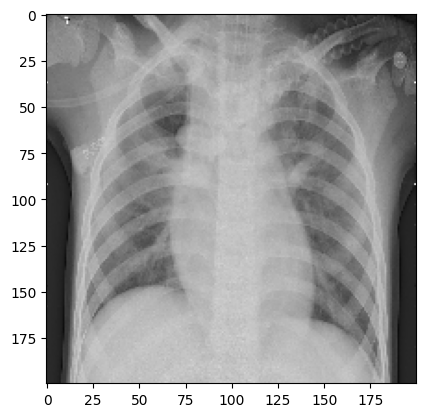

1/1 [==============================] - 0s 50ms/step
X-Ray shows signs of Pnuemonia


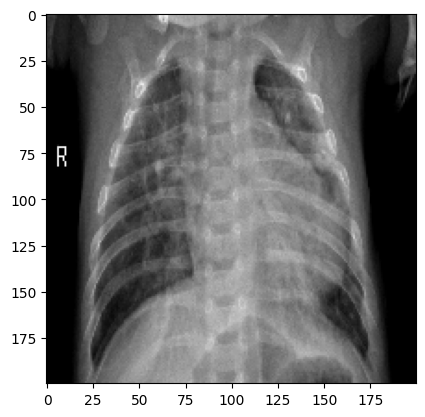

1/1 [==============================] - 0s 40ms/step
X-Ray shows NO signs of Pnuemonia


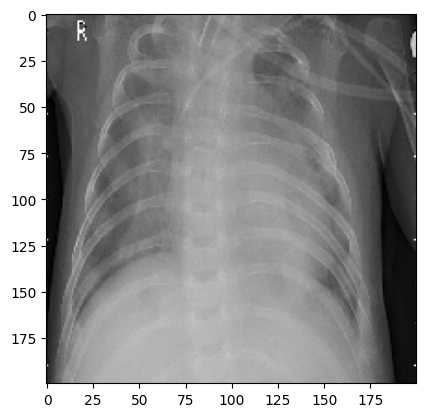

1/1 [==============================] - 0s 47ms/step
X-Ray shows signs of Pnuemonia


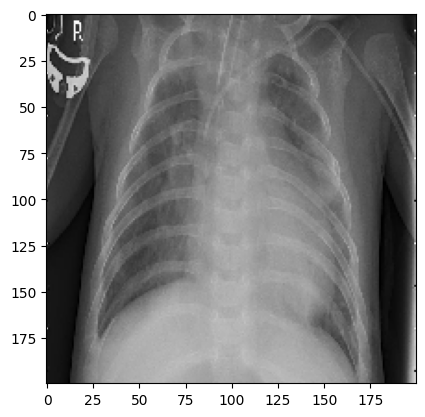

1/1 [==============================] - 0s 41ms/step
X-Ray shows signs of Pnuemonia


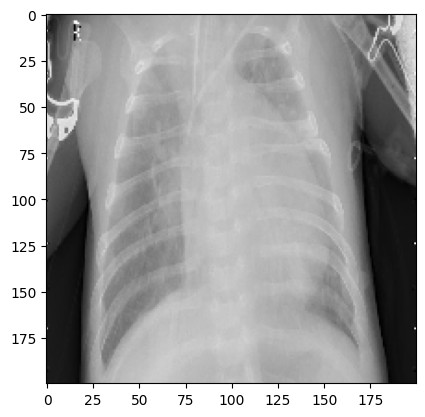

1/1 [==============================] - 0s 43ms/step
X-Ray shows signs of Pnuemonia


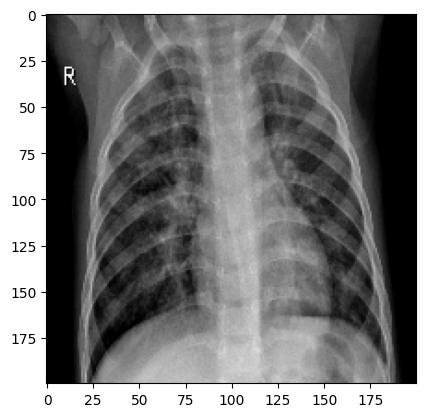

1/1 [==============================] - 0s 53ms/step
X-Ray shows signs of Pnuemonia


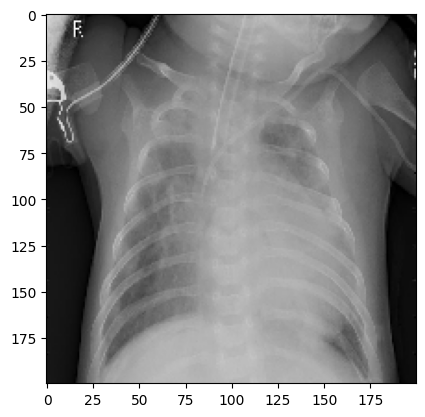

1/1 [==============================] - 0s 42ms/step
X-Ray shows signs of Pnuemonia


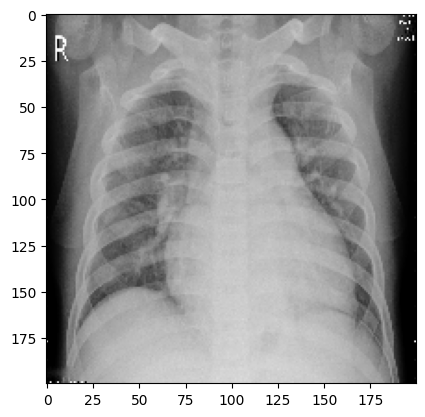

1/1 [==============================] - 0s 42ms/step
X-Ray shows NO signs of Pnuemonia


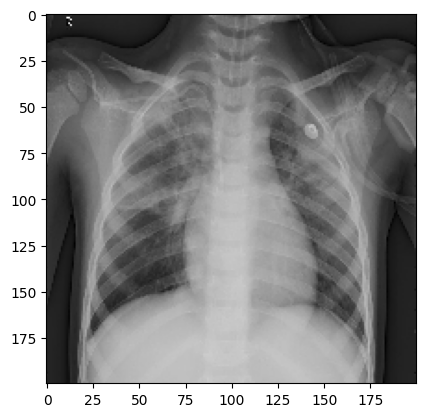

1/1 [==============================] - 0s 42ms/step
X-Ray shows signs of Pnuemonia


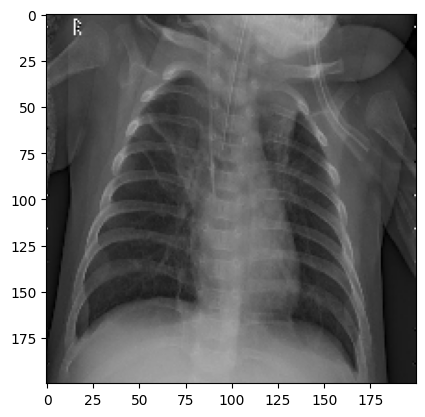

1/1 [==============================] - 0s 41ms/step
X-Ray shows signs of Pnuemonia


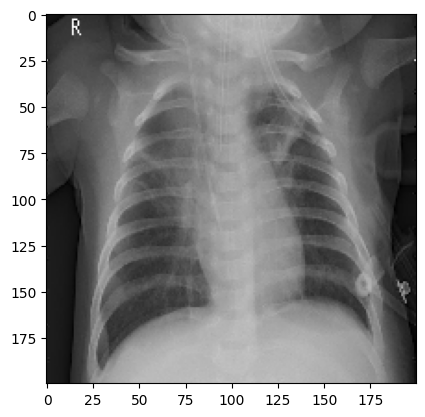

1/1 [==============================] - 0s 57ms/step
X-Ray shows signs of Pnuemonia


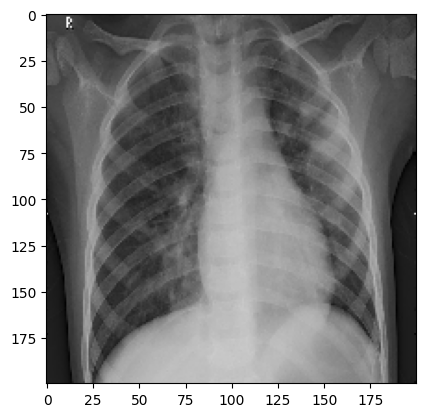

1/1 [==============================] - 0s 53ms/step
X-Ray shows signs of Pnuemonia


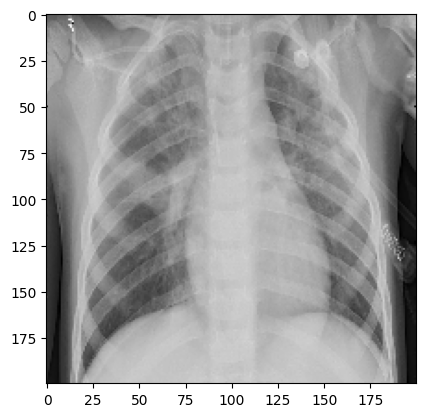

1/1 [==============================] - 0s 57ms/step
X-Ray shows signs of Pnuemonia


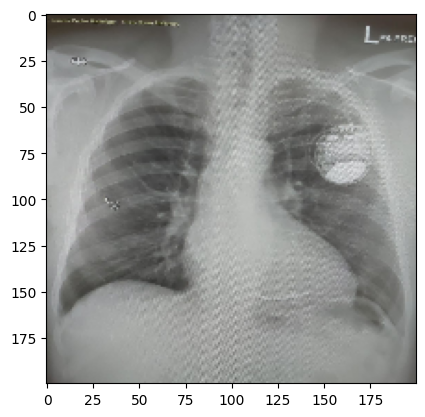

1/1 [==============================] - 0s 48ms/step
X-Ray shows signs of Pnuemonia


In [12]:
dir_path = '/content/drive/MyDrive/xray_samples/test/err'

for i in os.listdir(dir_path ):
    img = tf.keras.utils.load_img(dir_path+'//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print ("X-Ray shows signs of Pnuemonia")
    else:
        print ("X-Ray shows NO signs of Pnuemonia")